# Loan Prediction Problem¶
A Finance company wants to automate the loan eligibility process based on the customer details provided while filling application form. These details are Gender,Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

# Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data loading and cleaning

In [ ]:
# Loading dataset
train = pd.read_csv('/content/sample_data/train.csv')
predict = pd.read_csv('/content/sample_data/test.csv')

#Let's Make copy of the original datasets so we do not hamper the original datasets.

In [ ]:
train_original = train.copy()
predict_original = predict.copy()

In [ ]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
predict.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


# Bonus point 1: Data Cleaning - Checking and working with missing value

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Fill in missing value for numerical variables

<Axes: >

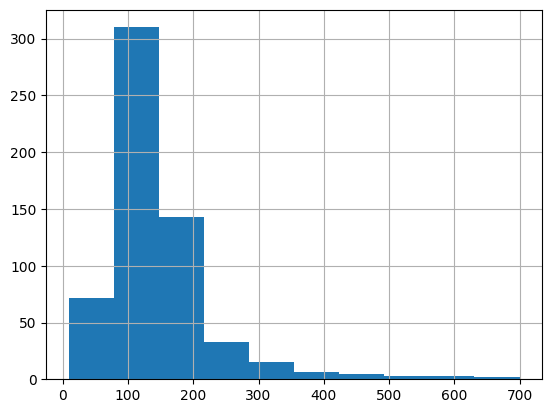

In [ ]:
train['LoanAmount'].hist()
# Right skew, could use median to fill in missing value

In [ ]:
# # Fill in missing value with median
# # Inspect missing values in the dataset
# print(train[['LoanAmount']].isnull().values.sum())
# # Impute the missing values with median imputation
# train[["LoanAmount"]] = train[["LoanAmount"]].fillna(train[["LoanAmount"]].median())
# # Count the number of NaNs in the dataset to verify
# print(train[['LoanAmount']].isnull().values.sum())
# train

In [ ]:
# Using knn imputation fill in numerical missing value (used when dataset is small to medium)
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
train_imputed = knn_imputer.fit_transform(train[["LoanAmount"]])
train[["LoanAmount"]] = train_imputed
train
print(train[['LoanAmount']].isnull().values.sum())

0


## Fill in missing value for categorical variables

In [ ]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype('object')
train['Credit_History'] = train['Credit_History'].astype('object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    object 
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 62.5+ KB


In [ ]:
for col in train.columns:
    # Check if the column is of object type
    if train[col].dtypes == 'object':
        # Impute with the most frequent value
        train[col] = train[col].fillna(train[col].value_counts().index[0])
# Count the number of NaNs in the dataset and print the counts to verify
print(train.isnull().values.sum())

0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


## Handling ouliers

<Axes: ylabel='ApplicantIncome'>

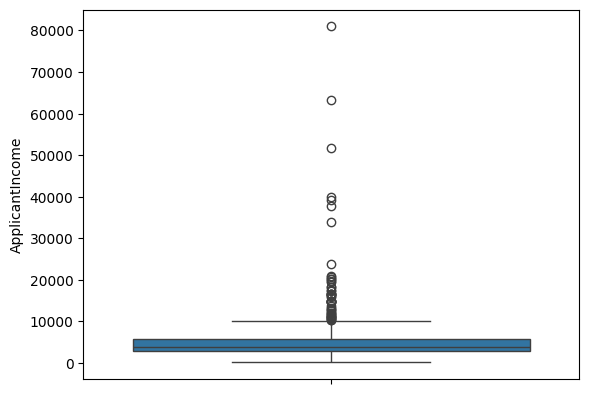

In [ ]:
sns.boxplot(train['ApplicantIncome'])

<Axes: ylabel='CoapplicantIncome'>

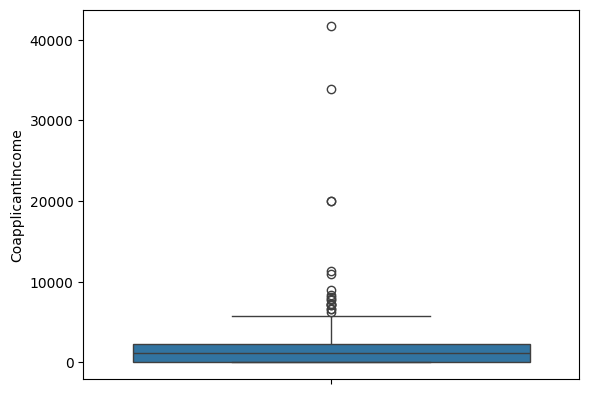

In [ ]:
sns.boxplot(train['CoapplicantIncome'])

<Axes: ylabel='LoanAmount'>

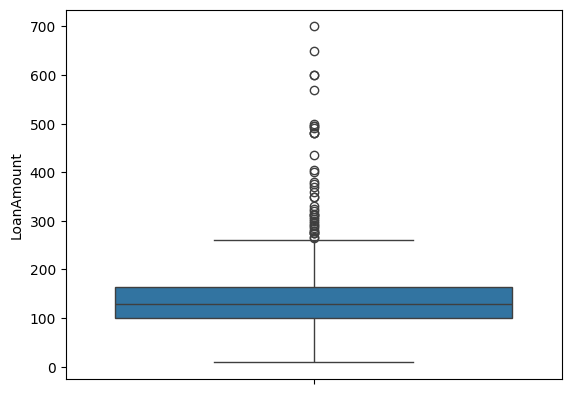

In [ ]:
sns.boxplot(train['LoanAmount'])

# Bonus Point 2: EDA

## distribution of numerical variable

<ipython-input-19-96158bba4b15>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

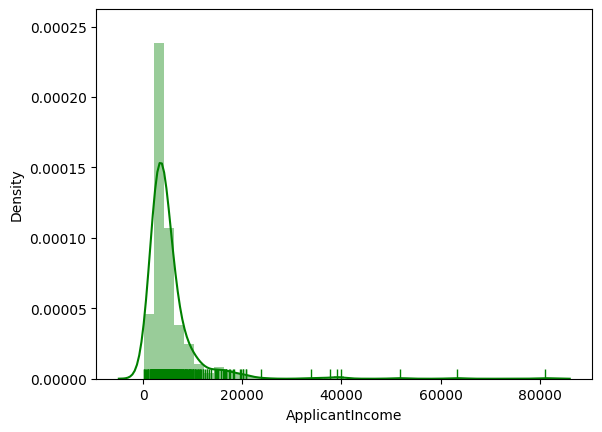

In [ ]:
sns.distplot(train['ApplicantIncome'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)

<ipython-input-20-92df1bb598b1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['CoapplicantIncome'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

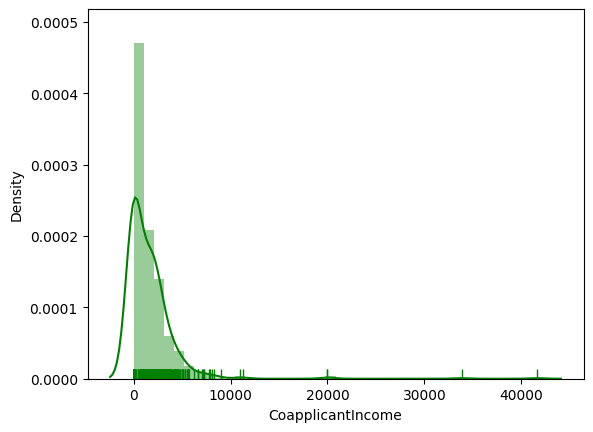

In [ ]:
sns.distplot(train['CoapplicantIncome'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)

<ipython-input-21-b58a78d348c6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['LoanAmount'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)


<Axes: xlabel='LoanAmount', ylabel='Density'>

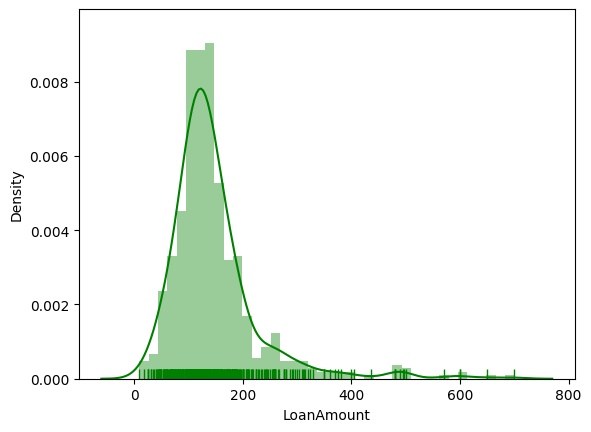

In [ ]:
sns.distplot(train['LoanAmount'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)

## Stripplot (relationship between numerical and categorical)

In [ ]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

<ipython-input-23-c7bdfa6d8330>:2: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='Gender', y='LoanAmount', hue='Loan_Status', data=train,


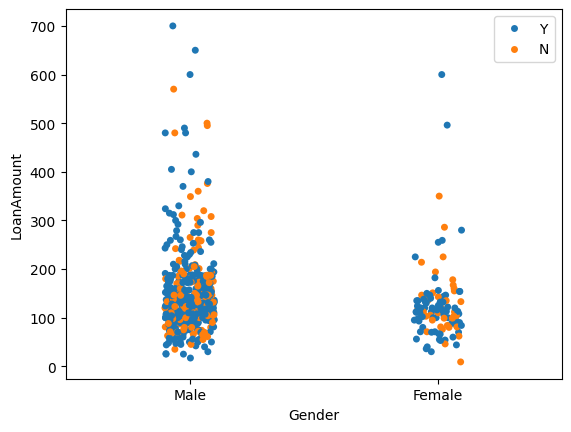

In [ ]:
# Loan_Status vs. Gender vs. LoanAmount
sns.stripplot(x='Gender', y='LoanAmount', hue='Loan_Status', data=train,
                      color=None, palette=None, size=5,
                      edgecolor="gray", linewidth=0,
                      ax=None)
plt.legend(loc='best')

<ipython-input-24-2ee275a11ce2>:2: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='Credit_History', y='LoanAmount', hue='Loan_Status', data=train,


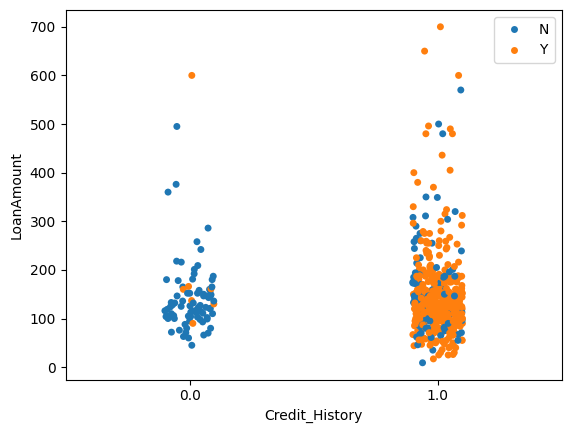

In [ ]:
# Loan_Status vs. Credit_History vs. LoanAmount
sns.stripplot(x='Credit_History', y='LoanAmount', hue='Loan_Status', data=train,
                      color=None, palette=None, size=5,
                      edgecolor="gray", linewidth=0,
                      ax=None)
plt.legend(loc='best')

<ipython-input-25-d604d4357f3a>:2: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='Self_Employed', y='TotalIncome', hue='Loan_Status', data=train,


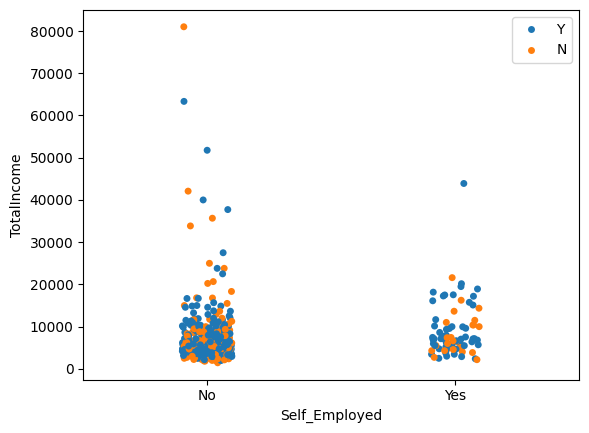

In [ ]:
# Loan_Status vs. Self_Employed vs. TotalIncome
sns.stripplot(x='Self_Employed', y='TotalIncome', hue='Loan_Status', data=train,
                      color=None, palette=None, size=5,
                      edgecolor="gray", linewidth=0,
                      ax=None)
plt.legend(loc='best')

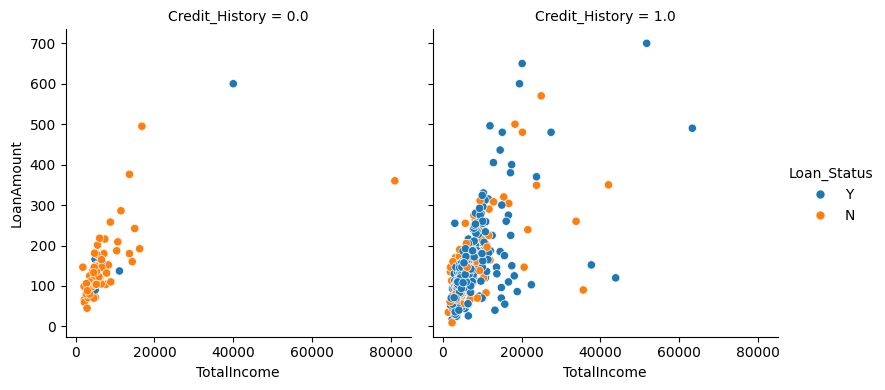

In [ ]:
# relational plot
# TotalIncome vs. LoanAmount vs. Loan_Status vs. Credit History
sns.color_palette('pastel')
ax = sns.relplot(data=train, kind='scatter', x='TotalIncome', y='LoanAmount', hue='Loan_Status', col='Credit_History', height=4)
plt.show()

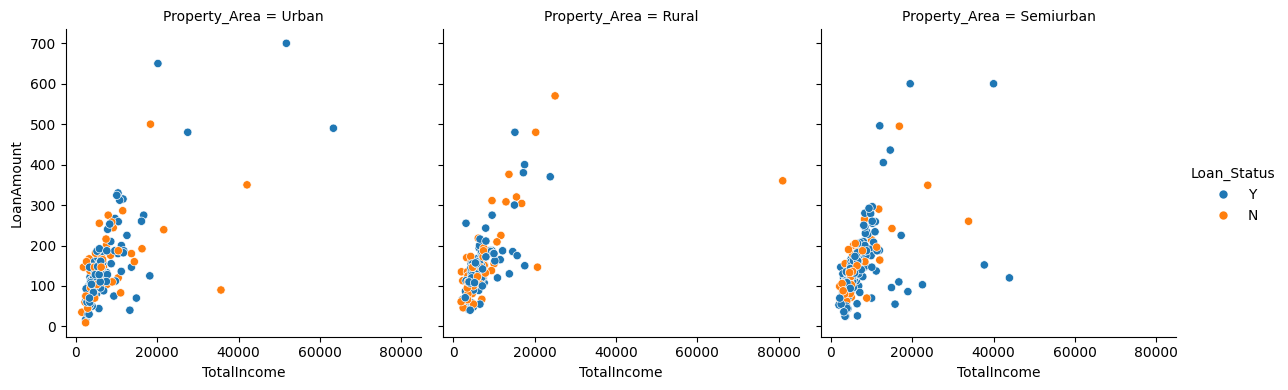

In [ ]:
# relational plot
# TotalIncome vs. LoanAmount vs. Loan_Status vs. Property_Area
sns.color_palette('pastel')
ax = sns.relplot(data=train, kind='scatter', x='TotalIncome', y='LoanAmount', hue='Loan_Status', col='Property_Area', height=4)
plt.show()

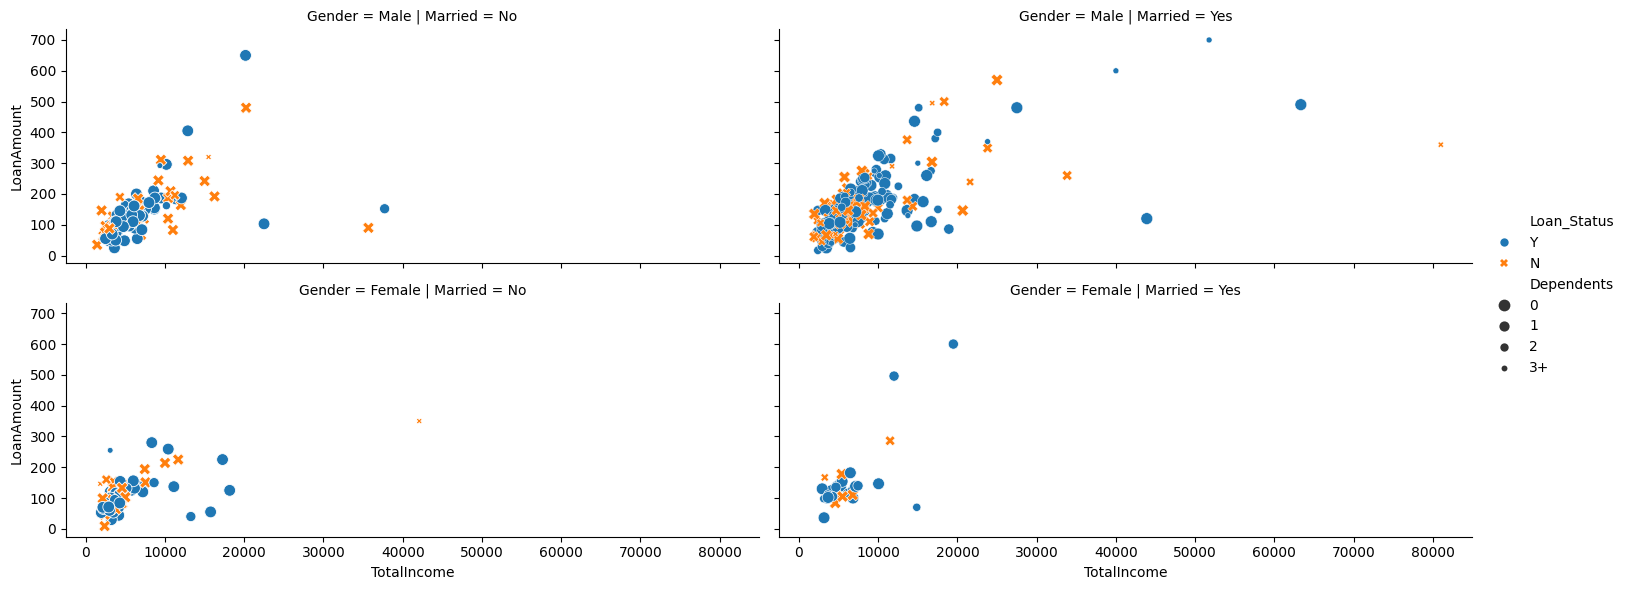

In [ ]:
sns.color_palette('pastel')
ax = sns.relplot(data=train, kind='scatter', x='TotalIncome',y='LoanAmount',hue='Loan_Status',col='Married', height=3, style='Loan_Status',
                 size='Dependents', row='Gender', aspect=2.5)
plt.show()

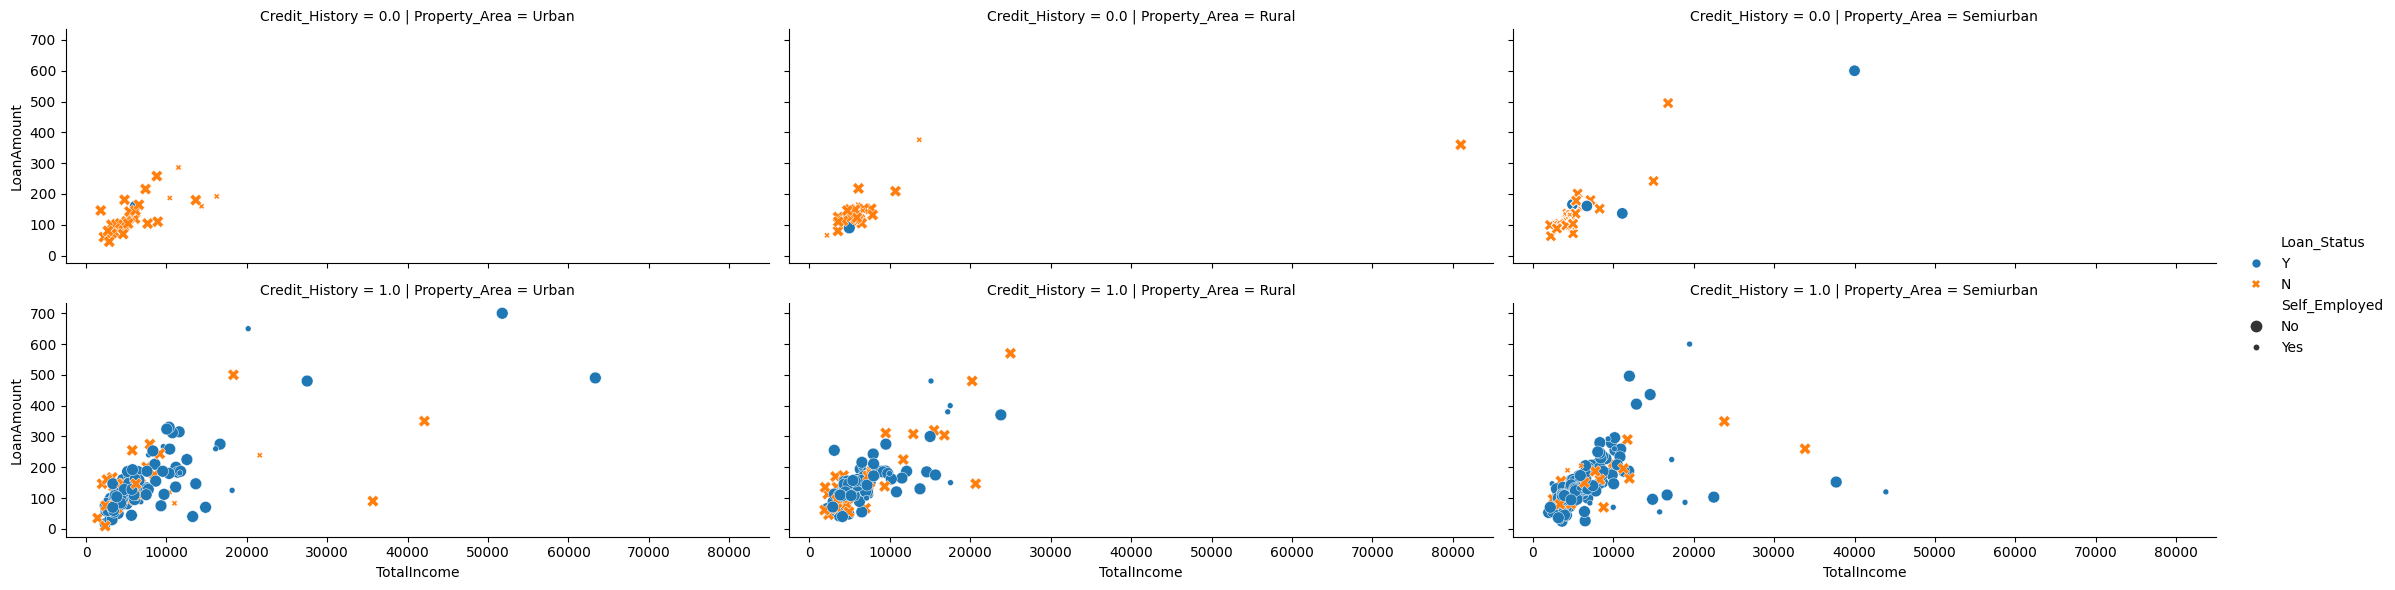

In [ ]:
sns.color_palette('pastel')
ax = sns.relplot(data=train, kind='scatter', x='TotalIncome',y='LoanAmount',hue='Loan_Status',col='Property_Area', height=3, style='Loan_Status',
                 size='Self_Employed', row='Credit_History', aspect=2.5)
plt.show()

In [ ]:
train = train.drop(['TotalIncome'], axis=1)

# Exploratory Data Analysis

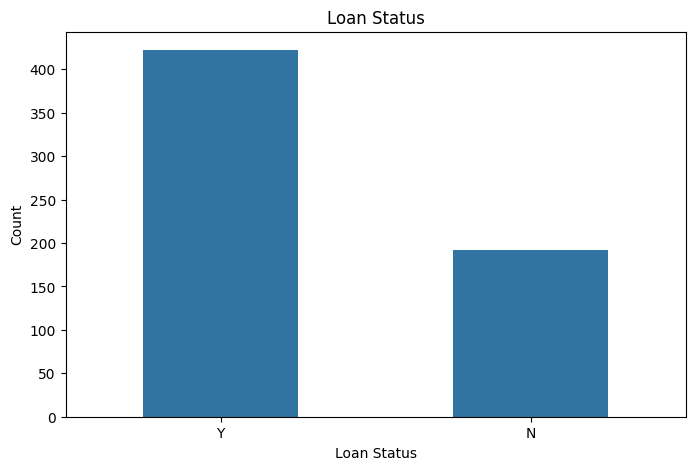

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='Loan_Status',width=0.5)
plt.title('Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

The loan of 422(around 69%) people out of 614 was approved.

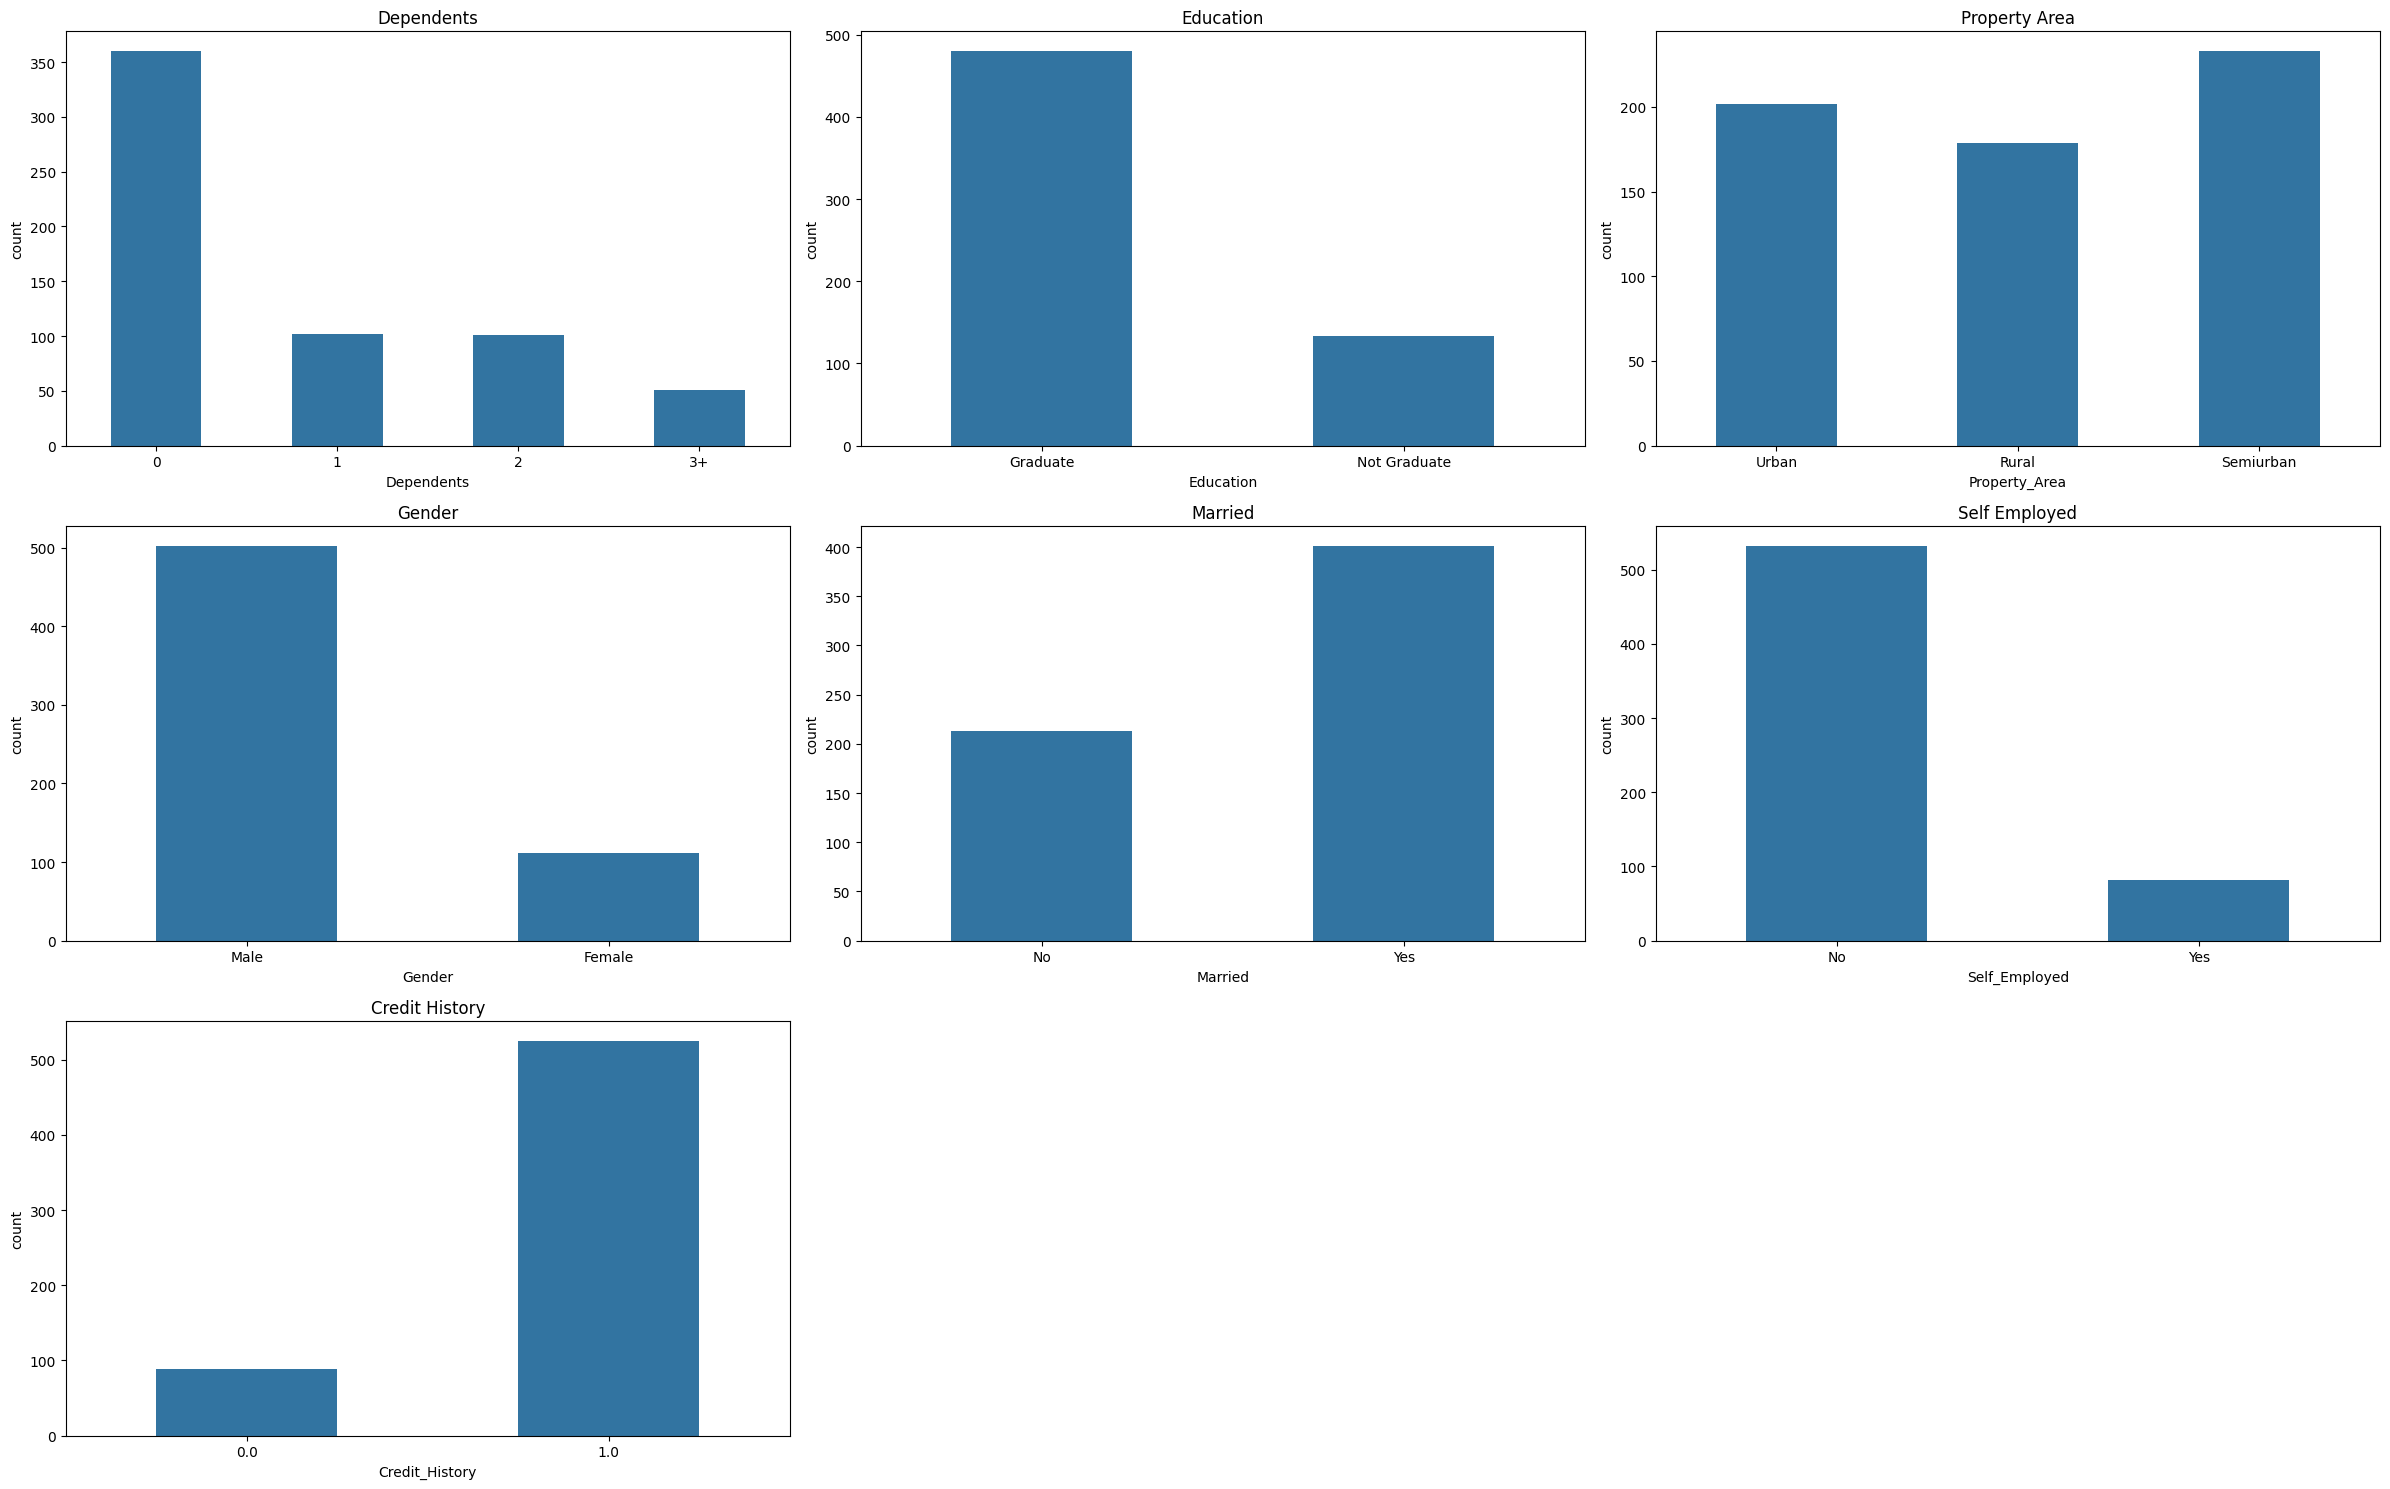

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(24, 15))

# Create subplots for the first set of variables (1x3)
plt.subplot(331)
sns.countplot(data=train, x='Dependents',width=0.5)
plt.title('Dependents')

plt.subplot(332)
sns.countplot(data=train, x='Education',width=0.5)
plt.title('Education')

plt.subplot(333)
sns.countplot(data=train, x='Property_Area',width=0.5)
plt.title('Property Area')

# Create subplots for the second set of variables (2x2)
plt.subplot(334)
sns.countplot(data=train, x='Gender',width=0.5)
plt.title('Gender')

plt.subplot(335)
sns.countplot(data=train, x='Married',width=0.5)
plt.title('Married')

plt.subplot(336)
sns.countplot(data=train, x='Self_Employed',width=0.5)
plt.title('Self Employed')

plt.subplot(337)
sns.countplot(data=train, x='Credit_History',width=0.5)
plt.title('Credit History')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

- Most of the applicants don't have dependents.
- Around 80% of the applicants are graduate.
- Most of the applicants are from Semiurban area.
- 80% applicants in the dataset are male.
- Around 65% people are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.

<ipython-input-33-d071df84ce5d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome'])


<Axes: >

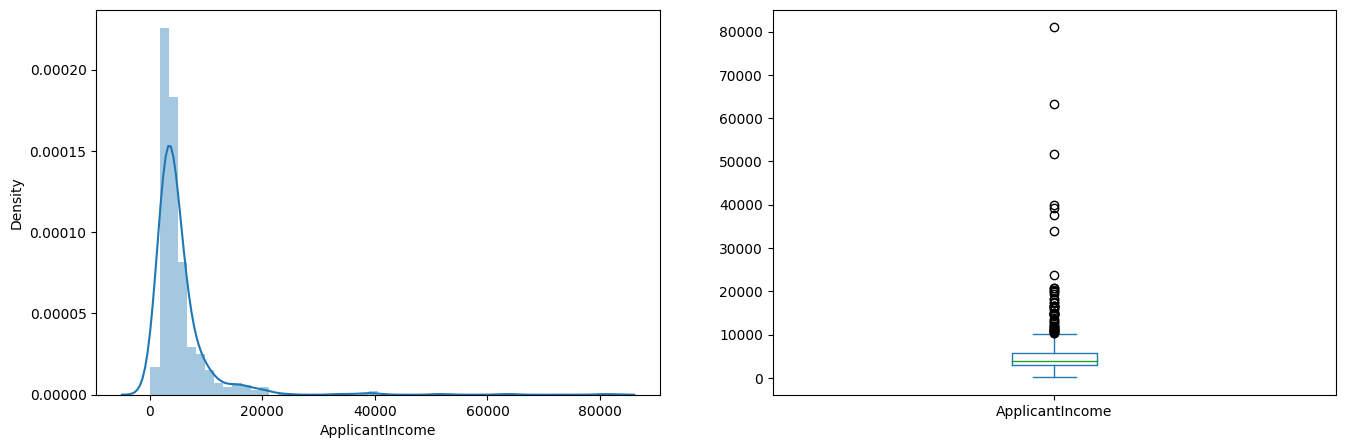

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

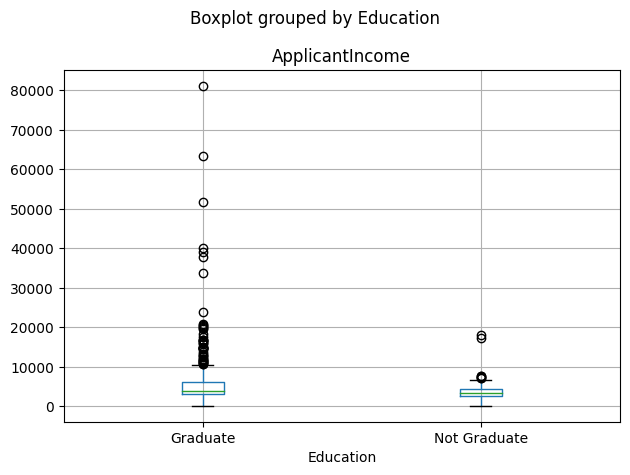

In [ ]:
train.boxplot(column= 'ApplicantIncome', by='Education')
plt.tight_layout()

There are higher number of graduates with very high incomes which are appearing to be outliers.

In [ ]:
married_crosstab = pd.crosstab(train['Married'], train['Loan_Status'])
married_crosstab

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


In [ ]:
married_crosstab = pd.crosstab(train['Married'], train['Loan_Status'], normalize='index')
married_crosstab

Loan_Status,N,Y
Married,,
No,0.370892,0.629108
Yes,0.281796,0.718204


<class 'pandas.core.frame.DataFrame'>


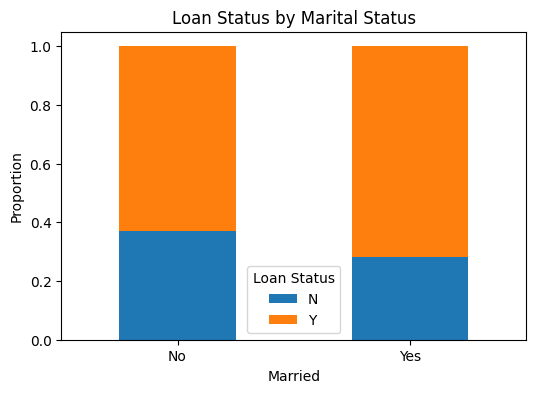

In [ ]:
# Create a crosstab to calculate the proportions
married_crosstab = pd.crosstab(train['Married'], train['Loan_Status'], normalize='index')
print(type(married_crosstab))
married_crosstab.plot(kind='bar',stacked=True, figsize=(6, 4))
plt.title('Loan Status by Marital Status')
plt.xlabel('Married')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.show()

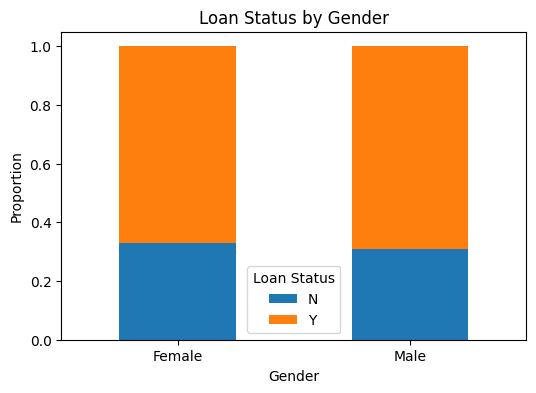

In [ ]:
# Create a crosstab to calculate the proportions
gender_crosstab = pd.crosstab(train['Gender'], train['Loan_Status'], normalize='index')
gender_crosstab.plot(kind='bar',stacked=True, figsize=(6, 4))
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.show()

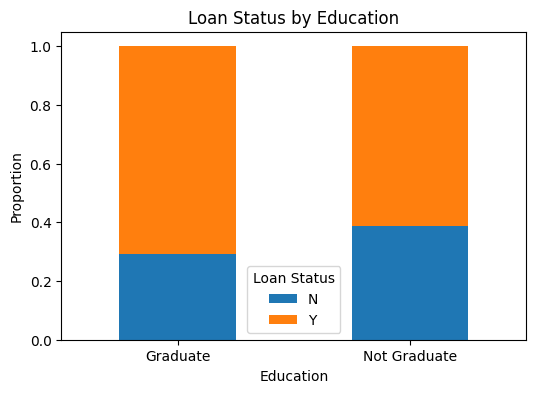

In [ ]:
# Create a crosstab to calculate the proportions
education_crosstab = pd.crosstab(train['Education'], train['Loan_Status'], normalize='index')
education_crosstab.plot(kind='bar',stacked=True, figsize=(6, 4))
plt.title('Loan Status by Education')
plt.xlabel('Education')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.show()

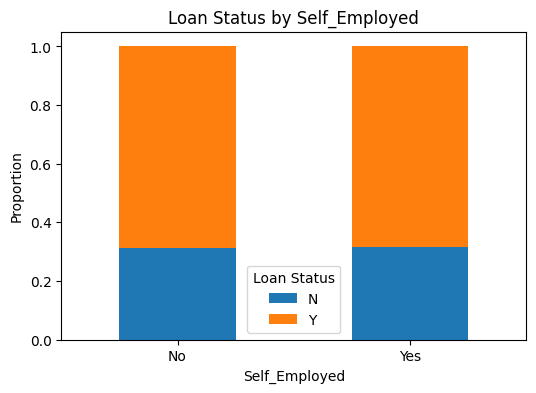

In [ ]:
# Create a crosstab to calculate the proportions
self_employed_crosstab = pd.crosstab(train['Self_Employed'], train['Loan_Status'], normalize='index')
self_employed_crosstab.plot(kind='bar',stacked=True, figsize=(6, 4))
plt.title('Loan Status by Self_Employed')
plt.xlabel('Self_Employed')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.show()

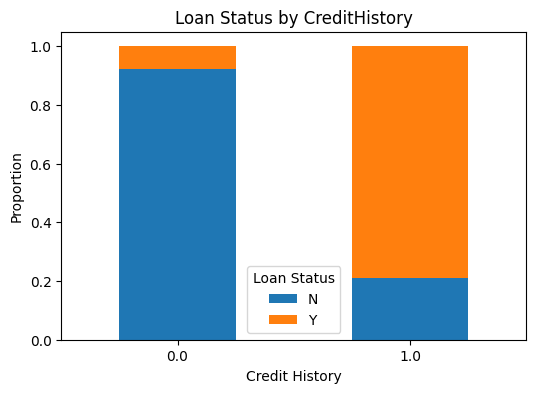

In [ ]:
# Create a crosstab to calculate the proportions
Credit_History_crosstab = pd.crosstab(train['Credit_History'], train['Loan_Status'], normalize='index')
Credit_History_crosstab.plot(kind='bar',stacked=True, figsize=(6, 4))
plt.title('Loan Status by CreditHistory')
plt.xlabel('Credit History')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.show()

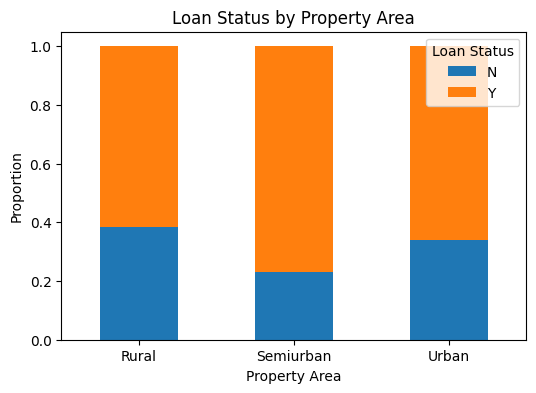

In [ ]:
# Create a crosstab to calculate the proportions
property_area_crosstab = pd.crosstab(train['Property_Area'], train['Loan_Status'], normalize='index')
property_area_crosstab.plot(kind='bar',stacked=True, figsize=(6, 4))
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.show()

- Proportion of married applicants is higher for the approved loans.
- People with credit history as 1 are more likely to get their loan approved.
- Proportion of loans getting approved in semiurban area is higher compared to rural or urban area.

In [ ]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group= ['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=group)
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,Very High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0,Average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0,High
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0,Very High
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0,Very High


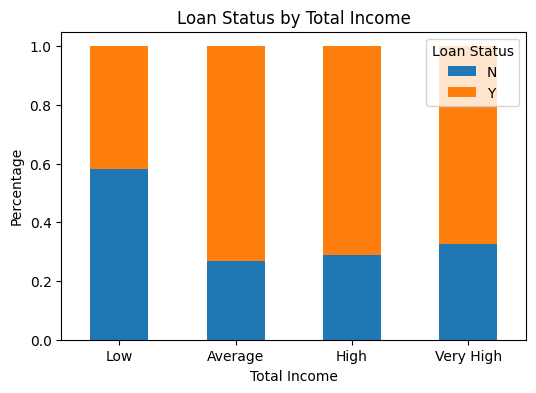

In [ ]:
# Create a crosstab to calculate the proportions
Total_Income_bin_crosstab = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'], normalize='index')
Total_Income_bin_crosstab.plot(kind='bar',stacked=True, figsize=(6, 4))
plt.title('Loan Status by Total Income')
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.show()

Proportions of loan getting approvals for applicants having low Total_Income is very less compared to that of applicants with Average, High and Very High income.

In [ ]:
train = train.drop(['Total_Income', 'Total_Income_bin'], axis=1)

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
train['Dependents'].replace('3+', 3, inplace=True)
predict['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

<Axes: >

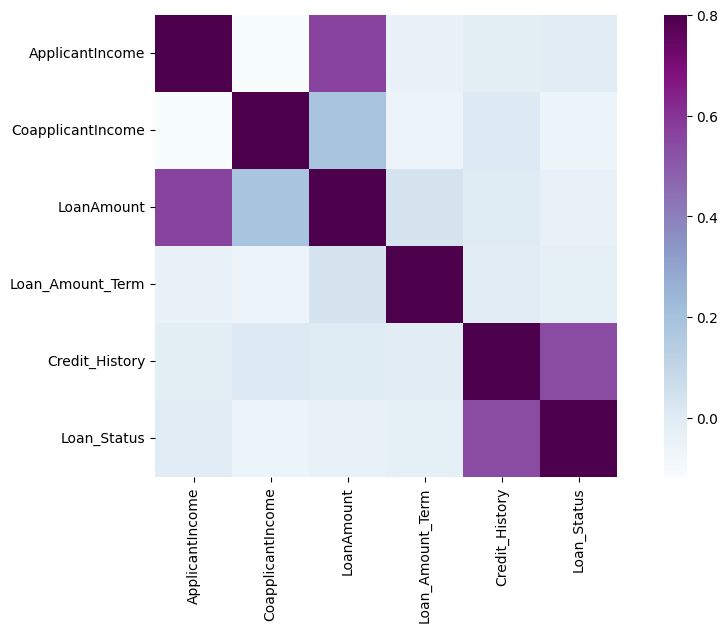

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(train[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Loan_Status"]].corr(), vmax=0.8, square=True, cmap='BuPu')

We can see that most correlated variables are (ApplicantIncome-LoanAmount) and (Credit_History-Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

# Model Building

# Bonus Point 3: Drop additional column

In [ ]:
X = train.drop(['Loan_ID','Loan_Status'], axis = 1)
y = train['Loan_Status']

# one hot encoding

In [ ]:
# train = pd.get_dummies(train)
# predict = pd.get_dummies(predict)
X = pd.get_dummies(X)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,False,True,True,False,False,True,False,False,True,False,True,False,False,False,True
1,4583,1508.0,128.000000,360.0,1.0,False,True,False,True,False,False,True,False,True,False,True,False,True,False,False
2,3000,0.0,66.000000,360.0,1.0,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.000000,360.0,1.0,False,True,False,True,False,True,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.000000,360.0,1.0,False,True,True,False,False,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False
610,4106,0.0,40.000000,180.0,1.0,False,True,False,True,True,False,False,False,True,False,True,False,True,False,False
611,8072,240.0,253.000000,360.0,1.0,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True
612,7583,0.0,187.000000,360.0,1.0,False,True,False,True,False,False,False,True,True,False,True,False,False,False,True


## Normalization/Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
# Selecting the columns to be standardized
columns_to_standardize = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
# Creating a StandardScaler object
scaler = StandardScaler()
# Fitting and transforming the selected columns
X[columns_to_standardize] = scaler.fit_transform(X[columns_to_standardize])

# Split train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
351,0.548248,0.870681,1.924375,0.273231,1.0,False,True,True,False,False,True,False,False,True,False,True,False,True,False,False
593,-0.253021,0.574156,-0.052545,-2.522836,1.0,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False
320,-0.492042,0.186655,-0.374092,0.273231,1.0,False,True,False,True,False,True,False,False,True,False,True,False,False,True,False
186,-0.528412,-0.554487,-0.957641,-0.658791,0.0,False,True,False,True,False,False,True,False,True,False,False,True,True,False,False
557,0.775801,-0.554487,1.352735,0.273231,1.0,False,True,False,True,True,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,-0.376873,-0.109870,-0.790913,0.273231,1.0,False,True,False,True,False,True,False,False,True,False,True,False,False,False,True
9,1.218457,3.196713,2.412650,0.273231,1.0,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False
359,-0.038738,0.528668,0.638186,0.273231,1.0,False,True,False,True,True,False,False,False,True,False,True,False,False,True,False
192,0.103135,-0.554487,0.161820,0.273231,1.0,False,True,False,True,False,True,False,False,False,True,True,False,False,False,True


# 1. Train Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=500)

## hyperparameter tuning

In [ ]:
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter' : [100, 500, 1000]
}
from sklearn.model_selection import GridSearchCV
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train, y_train)
print(lr_grid_search.best_score_)
lr_best = lr_grid_search.best_estimator_
print(lr_best)

0.7995896032831737
LogisticRegression(C=1, solver='liblinear')


In [ ]:
lr_pred_train = lr_best.predict(X_train)
lr_pred_test = lr_best.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, lr_pred_test))
print('Training set accuracy: ', metrics.accuracy_score(y_train, lr_pred_train))
print('Test set accuracy: ', metrics.accuracy_score(y_test, lr_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185

Training set accuracy:  0.8041958041958042
Test set accuracy:  0.8324324324324325


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_best, X, y, cv=5)
print(np.mean(scores))

0.8078368652538984


# Bonus Point 6: feature importance

In [ ]:
# lr_best.feature_importances_

# 2. Train KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

## hyperparameter tuning

In [ ]:
knn_param_grid = {
    'n_neighbors': [5, 15, 20, 25],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}
from sklearn.model_selection import GridSearchCV
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=4, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)
print(knn_grid_search.best_score_)
knn_best = knn_grid_search.best_estimator_
print(knn_best)

0.7015403253721011
KNeighborsClassifier(metric='manhattan', n_neighbors=15, p=1)


In [ ]:
knn_pred_train = knn_best.predict(X_train)
knn_pred_test = knn_best.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, knn_pred_test))
print('Training set accuracy: ', metrics.accuracy_score(y_train, knn_pred_train))
print('Test set accuracy: ', metrics.accuracy_score(y_test, knn_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.18      0.30        51
           1       0.76      1.00      0.86       134

    accuracy                           0.77       185
   macro avg       0.88      0.59      0.58       185
weighted avg       0.83      0.77      0.71       185

Training set accuracy:  0.7202797202797203
Test set accuracy:  0.772972972972973


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_best, X, y, cv=4)
print(np.mean(scores))

0.7214795008912656


# 3. Train SVM Model

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()

## hyperparameter tuning

In [ ]:
svm_param_grid = {'C': [0.1, 1, 10, 100],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf', 'linear']}
from sklearn.model_selection import GridSearchCV
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='accuracy',verbose = 3)
svm_grid_search.fit(X_train, y_train)
print(svm_grid_search.best_score_)
svm_best = svm_grid_search.best_estimator_
print(svm_best)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.663 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.674 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.674 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.674 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.671 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.837 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.814 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.802 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.744 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.812 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.663 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

In [ ]:
svm_pred_train = svm_best.predict(X_train)
svm_pred_test = svm_best.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, svm_pred_test))
print('Training set accuracy: ', metrics.accuracy_score(y_train, svm_pred_train))
print('Test set accuracy: ', metrics.accuracy_score(y_test, svm_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

Training set accuracy:  0.8018648018648019
Test set accuracy:  0.827027027027027


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_best, X, y, cv=4)
print(np.mean(scores))

0.8095025889143536


# 4. Train Decision Tree Classification Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

## hyperparameter tuning

In [ ]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4],
}
from sklearn.model_selection import GridSearchCV
# Setting GridSearchCV
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
# train model
dt_grid_search.fit(X_train, y_train)
# best score
print(dt_grid_search.best_score_)
# best model
dt_best = dt_grid_search.best_estimator_
print(dt_best)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8018878248974008
DecisionTreeClassifier(max_depth=1)


In [ ]:
# Evaluate the model on the test set
dt_pred_train = dt_best.predict(X_train)
dt_pred_test = dt_best.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, dt_pred_test))
print('Training set accuracy: ', metrics.accuracy_score(y_train, dt_pred_train))
print('Test set accuracy: ', metrics.accuracy_score(y_test, dt_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

Training set accuracy:  0.8018648018648019
Test set accuracy:  0.827027027027027


In [ ]:
dt_best.feature_importances_

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [ ]:
dt_imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": dt_best.feature_importances_
})

In [ ]:
dt_imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
4,Credit_History,1.0
0,ApplicantIncome,0.0
11,Dependents_1,0.0
18,Property_Area_Semiurban,0.0
17,Property_Area_Rural,0.0
16,Self_Employed_Yes,0.0
15,Self_Employed_No,0.0
14,Education_Not Graduate,0.0
13,Education_Graduate,0.0
12,Dependents_2,0.0


# 5. Train Random Forest Classification Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

## hyperparameter tuning

In [ ]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 5, 10],
    'min_samples_split': [4, 5, 7],
    'min_samples_leaf': [1, 2, 4],
}
# Perform Grid Search with cross-validation
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
# train model
rf_grid_search.fit(X_train, y_train)
# best score
print(rf_grid_search.best_score_)
# best model
rf_best = rf_grid_search.best_estimator_
print(rf_best)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
0.8065663474692203
RandomForestClassifier(max_depth=5, min_samples_split=7)


In [ ]:
# Evaluate the model on the test set
rf_pred_train = rf_best.predict(X_train)
rf_pred_test = rf_best.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, rf_pred_test))
print('Training set accuracy: ', metrics.accuracy_score(y_train, rf_pred_train))
print('Test set accuracy: ', metrics.accuracy_score(y_test, rf_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.41      0.56        51
           1       0.81      0.98      0.89       134

    accuracy                           0.82       185
   macro avg       0.84      0.69      0.72       185
weighted avg       0.83      0.82      0.80       185

Training set accuracy:  0.8135198135198135
Test set accuracy:  0.8216216216216217


In [ ]:
rf_best.feature_importances_

array([0.10196423, 0.08882342, 0.11176   , 0.02535512, 0.47586635,
       0.00506482, 0.00823859, 0.01567605, 0.00910504, 0.01179102,
       0.01114191, 0.01298804, 0.0073606 , 0.01415596, 0.01901119,
       0.00641231, 0.00937686, 0.02021556, 0.03740194, 0.00829101])

In [ ]:
rf_imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
rf_imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
4,Credit_History,0.475866
2,LoanAmount,0.111760
0,ApplicantIncome,0.101964
1,CoapplicantIncome,0.088823
18,Property_Area_Semiurban,0.037402
3,Loan_Amount_Term,0.025355
17,Property_Area_Rural,0.020216
14,Education_Not Graduate,0.019011
7,Married_No,0.015676
13,Education_Graduate,0.014156


# 6. Train XGBoost Model

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

In [ ]:
y_train = y_train.replace({'Y': 1, 'N': 0})
y_test = y_test.replace({'Y': 1, 'N': 0})

In [ ]:
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)
print(xgb_grid_search.best_score_)
xgb_best = xgb_grid_search.best_estimator_
print(xgb_best)

0.8042407660738714
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


In [ ]:
xgb_pred_train = xgb_best.predict(X_train)
xgb_pred_test = xgb_best.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, xgb_pred_test))
print('Training set accuracy: ', metrics.accuracy_score(y_train, xgb_pred_train))
print('Test set accuracy: ', metrics.accuracy_score(y_test, xgb_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.43      0.58        51
           1       0.82      0.98      0.89       134

    accuracy                           0.83       185
   macro avg       0.85      0.70      0.74       185
weighted avg       0.84      0.83      0.81       185

Training set accuracy:  0.8205128205128205
Test set accuracy:  0.827027027027027


In [ ]:
xgb_best.feature_importances_

array([0.03723133, 0.03363174, 0.03387719, 0.03118603, 0.3753716 ,
       0.03414015, 0.05457338, 0.03263779, 0.03873412, 0.02724757,
       0.02511713, 0.03230985, 0.02052914, 0.03242251, 0.0247645 ,
       0.02517229, 0.03613327, 0.03486814, 0.04687686, 0.02317543],
      dtype=float32)

In [ ]:
xgb_imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
xgb_imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
4,Credit_History,0.475866
2,LoanAmount,0.111760
0,ApplicantIncome,0.101964
1,CoapplicantIncome,0.088823
18,Property_Area_Semiurban,0.037402
3,Loan_Amount_Term,0.025355
17,Property_Area_Rural,0.020216
14,Education_Not Graduate,0.019011
7,Married_No,0.015676
13,Education_Graduate,0.014156
